In [1]:
# Import des librairies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from   statsmodels.compat import lzip
from   statsmodels.graphics.gofplots import ProbPlot
import statsmodels.stats.stattools

import scipy.stats as st
import scipy
from   scipy.stats import ks_2samp
import math
import random
import time

import matplotlib.mlab as mlab
import matplotlib.lines as mlines
from scipy.stats import norm

from statsmodels import graphics

## 1. Consommation d'électricité mensuelles

In [2]:
#     Consommation électrique  (Jan-2014,  2015, 2016, 2017,  Dec-2018)
#
# - Choix de la Nouvelle-Aquitaine

energie = pd.read_excel("RTE_energie_classeur.xlsx")                     # Sauvegarde en .xlsx (classeur) auparavant

energie

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bio-énergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges aves la Suisse,Echanges avec l'Allemagne et la Belgique
0,0000-00,Données consolidées,Grand-Est,7296,5505.0,864,153.0,8,701,537,...,70,3364,3876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000-00,Données définitives,Nouvelle-Aquitaine,4523,3740.0,26,NaN,9,16,162,...,131,3222,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000-00,Données définitives,Auvergne-Rhône-Alpes,8890,5946.0,32,4.0,17,10,2632,...,79,5010,3658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000-00,Données définitives,Bourgogne-Franche-Comté,152,NaN,19,0.0,0,19,19,...,20,1533,-1383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000-00,Données définitives,Bretagne,197,NaN,3,NaN,3,0,46,...,37,1493,-1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000-00,Données définitives,Centre-Val de Loire,6346,6191.0,0,NaN,0,0,1,...,34,1299,5047.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000-00,Données définitives,France,41255,29938.0,2683,582.0,206,1893,5291,...,809,34585,6011.0,7720.0,1708.0,1300.0,1746.0,1703.0,-124.0,1385.0
7,0000-00,Données définitives,Ile-de-France,148,NaN,5,0.0,4,1,4,...,119,4902,-4753.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000-00,Données définitives,Occitanie,2398,823.0,0,NaN,0,0,1049,...,59,2923,-688.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000-00,Données définitives,Normandie,5554,5222.0,204,57.0,23,123,9,...,44,1924,3629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
energie = energie[['Mois','Territoire','Consommation totale']]           # Sélection des colonnes utiles

# Sélection de la Nouvelle-Aquitaine (pour comparaison avec mon coach) ...
# et sélection des mesures entre Janvier 2014 et Décembre 2018,
#    car il n'y que des 0 pour l'année 2013 et l'année 2019 s'arrête au mois de Juillet(inclus)
energie = energie.loc[energie["Territoire"] == 'Nouvelle-Aquitaine'].\
                  loc[energie["Mois"] > '2013-12'].loc[energie["Mois"] < '2019-01']

# Territoires : 
#   'Grand-Est', 'Nouvelle-Aquitaine', 'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 
#   'Ile-de-France', 'Occitanie', 'Normandie', 'Hauts-de-France', 'PACA', 'Pays-de-la-Loire'

energie

,Mois,Territoire,Consommation totale
206,2014-01,Nouvelle-Aquitaine,4501
219,2014-02,Nouvelle-Aquitaine,4184
232,2014-03,Nouvelle-Aquitaine,3993
245,2014-04,Nouvelle-Aquitaine,3237
258,2014-05,Nouvelle-Aquitaine,3100
271,2014-06,Nouvelle-Aquitaine,2930
284,2014-07,Nouvelle-Aquitaine,3123
297,2014-08,Nouvelle-Aquitaine,2893
310,2014-09,Nouvelle-Aquitaine,2961
323,2014-10,Nouvelle-Aquitaine,3150


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


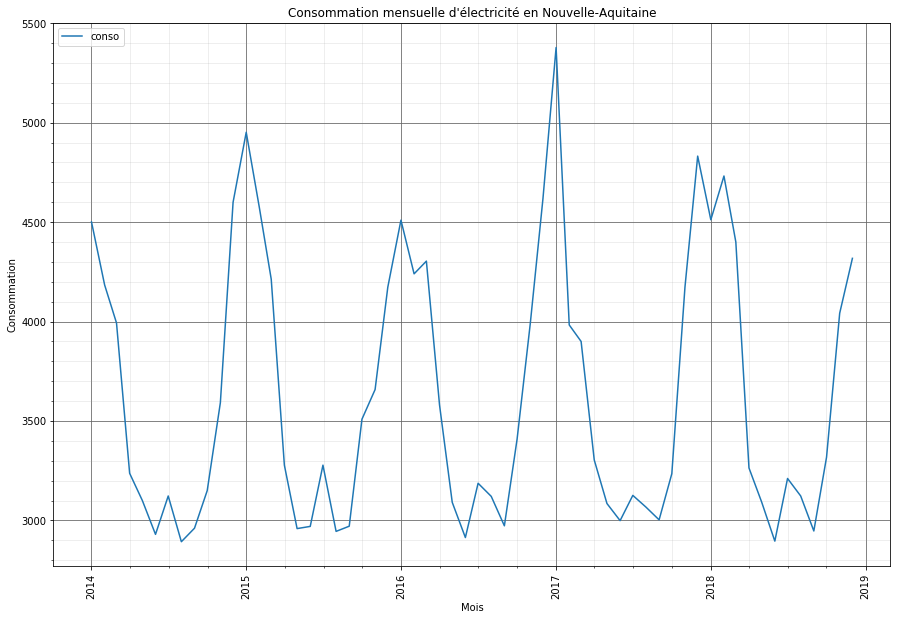

In [4]:
    
energie.columns = ['mois','territoire','conso']      # renommage des colonnes
energie = energie[['mois','conso']]                  # supression de la colonne 'territoire'
energie['mois']  = pd.to_datetime(energie['mois'])   # object >> datetime64
# energie = energie.set_index('mois')                # Le plot ne fonctionne pas si le 'mois' est l'index
energie = energie.reset_index()

fig = plt.figure(figsize = (15, 10))
plt.plot(energie["mois"], energie["conso"])
plt.title("Consommation mensuelle d'électricité en Nouvelle-Aquitaine")
plt.xlabel("Mois")
plt.ylabel("Consommation")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)
plt.legend(loc = 'upper left')
plt.show()


# Ce qu'on peut dire à ce stade :
# - Pas de données manquante ou abbérante

# On constate que la consommation énergétique semble avoir une saisonnalité de 12 mois de mois de Janvier à Janvier.
# On note des pics de consommation très élevés en hiver, pèriode ou la faible luminosité et T°c pousse à l'utilisation accru
#   de l'éclairage et du chauffage. 
# Les pics sont variables d'un hiver à l'autre, comme peut l'être la T°c d'un hiver à l'autre.
# Pour les pics observés en été, on peut emettre l'hypothèse d'une plus grande utilisation des appareils électro-ménagers
#      pour se protéger de la chaleur (climatisation/ventilateurs, réfrigérateurs/congélateur).

fig.savefig('consoElec', dpi=fig.dpi)

## 2. Les données météo

In [5]:
# Le degré jour unifié (DJU) est une valeur représentative de l’écart entre,
#   la température d’une journée donnée et un seuil de température préétabli (18 °C dans le cas des DJU ou Degré Jour Unifié). 
# Sommés sur une période, ils permettent de calculer les besoins de chauffage et de climatisation d’un bâtiment.

### DJU chauffage

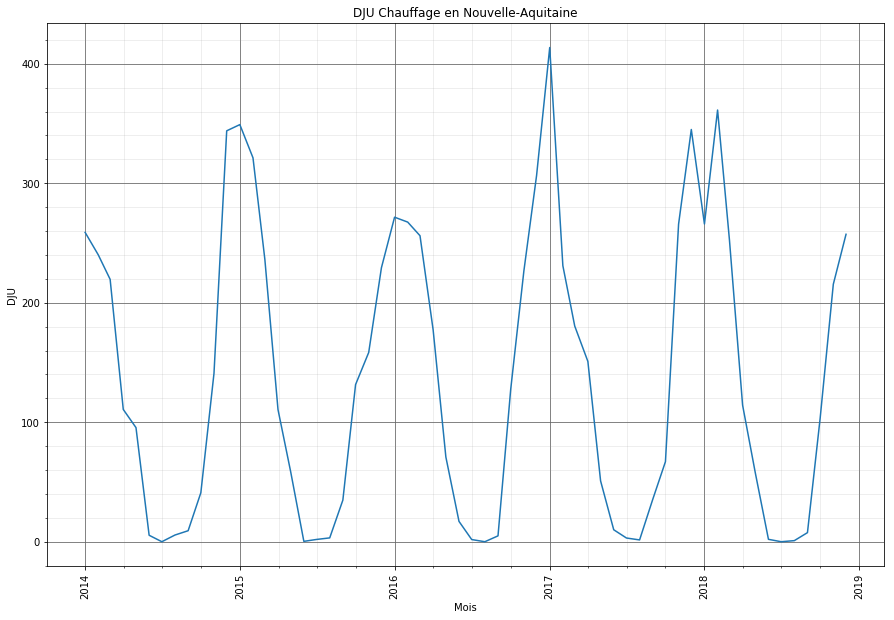

,index,mois,dju_ch
0,4,2014-01-01,258.9
1,9,2014-02-01,240.1
2,14,2014-03-01,219.6
3,19,2014-04-01,110.7
4,24,2014-05-01,95.5
5,29,2014-06-01,5.4
6,34,2014-07-01,0
7,39,2014-08-01,5.6
8,44,2014-09-01,9.2
9,49,2014-10-01,41


In [6]:
#     Degré Jour  (2014, 2015, 2016, 2017, 2018)
#
# Sur le site https://cegibat.grdf.fr/simulateur/calcul-dju ,  Export le 25 Octobre 2019
#
# On rentre les critères suivants :
#  - Station météo        :  33-Bordeaux-Mérignac
#  - Méthode de calcul    :  Météo
#  - Type d'usage         :  Chauffage
#  - T°c de référence     :  18°c
#  - Pèriode de chauffage :  Janvier_2014 à Décembre_2018
#

Chauf_dju = pd.read_excel("Chauf_dju.xlsx")


# Suppression des 11 premières lignes inutiles
Chauf_dju.drop([0,1,2,3,4,5,6,7,8,9,10], axis = 0, inplace = True)

# Renommage des colonnes restantes + Suppression de la colonne 'total'
Chauf_dju.columns = ['an','JAN', 'FEV', 'MARS', 'AVR','MAI','JUN','JUI','AOU','SEP','OCT','NOV','DEC','total']
Chauf_dju = Chauf_dju[['an','JAN', 'FEV', 'MARS', 'AVR','MAI','JUN','JUI','AOU','SEP','OCT','NOV','DEC']]

Chauf_dju = Chauf_dju.melt(id_vars = ['an'])   # unpivot


Chauf_dju.columns = ['an','mois','dju_ch']

Chauf_dju.loc[Chauf_dju['mois'] == 'JAN', 'mois']  = '-01'
Chauf_dju.loc[Chauf_dju['mois'] == 'FEV', 'mois']  = '-02'
Chauf_dju.loc[Chauf_dju['mois'] == 'MARS', 'mois'] = '-03'
Chauf_dju.loc[Chauf_dju['mois'] == 'AVR', 'mois']  = '-04'
Chauf_dju.loc[Chauf_dju['mois'] == 'MAI', 'mois']  = '-05'
Chauf_dju.loc[Chauf_dju['mois'] == 'JUN', 'mois']  = '-06'
Chauf_dju.loc[Chauf_dju['mois'] == 'JUI', 'mois']  = '-07'
Chauf_dju.loc[Chauf_dju['mois'] == 'AOU', 'mois']  = '-08'
Chauf_dju.loc[Chauf_dju['mois'] == 'SEP', 'mois']  = '-09'
Chauf_dju.loc[Chauf_dju['mois'] == 'OCT', 'mois']  = '-10'
Chauf_dju.loc[Chauf_dju['mois'] == 'NOV', 'mois']  = '-11'
Chauf_dju.loc[Chauf_dju['mois'] == 'DEC', 'mois']  = '-12'

Chauf_dju['an'] = Chauf_dju['an'].astype(str)
Chauf_dju['mois'] = Chauf_dju['an'] + Chauf_dju['mois']

Chauf_dju = Chauf_dju[['mois','dju_ch']]
Chauf_dju['mois']  = pd.to_datetime(Chauf_dju['mois'])   # object >> datetime64
Chauf_dju = Chauf_dju.sort_values(by = 'mois', ascending=True)
Chauf_dju = Chauf_dju.reset_index()

fig = plt.figure(figsize = (15, 10))
plt.plot(Chauf_dju["mois"], Chauf_dju["dju_ch"])
plt.title("DJU Chauffage en Nouvelle-Aquitaine")
plt.xlabel("Mois")
plt.ylabel("DJU")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)
plt.show()

Chauf_dju

### DJU climatisation

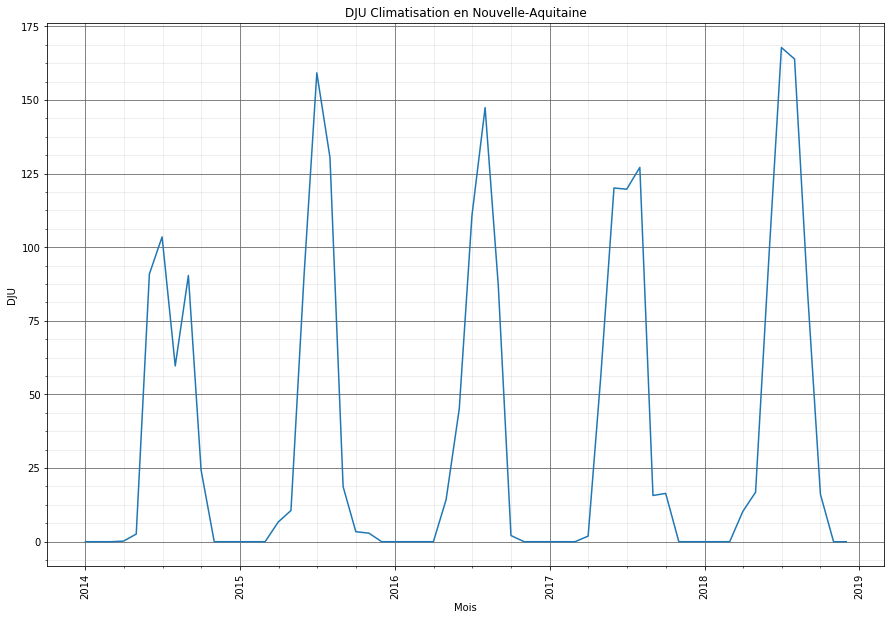

,index,mois,dju_cl
0,4,2014-01-01,0
1,9,2014-02-01,0
2,14,2014-03-01,0
3,19,2014-04-01,0.2
4,24,2014-05-01,2.6
5,29,2014-06-01,90.9
6,34,2014-07-01,103.5
7,39,2014-08-01,59.7
8,44,2014-09-01,90.4
9,49,2014-10-01,24.3


In [7]:
#     Degré Jour  (2014, 2015, 2016, 2017, 2018)
#
# Sur le site https://cegibat.grdf.fr/simulateur/calcul-dju ,  Export le 25 Octobre 2019
#
# On rentre les critères suivants :
# - Station météo        :  33-Bordeaux-Mérignac
# - Méthode de calcul    :  Météo
# - Type d'usage         :  Climatisation
# - T°c de référence     :  18°c
# - Pèriode de chauffage :  Janvier_2014 à Décembre_2018
#

Clim_dju = pd.read_excel("Clim_dju.xlsx")


Clim_dju.drop([0,1,2,3,4,5,6,7,8,9,10], axis = 0, inplace = True)

# Renommage des colonnes restantes
Clim_dju.columns = ['an','JAN', 'FEV', 'MARS', 'AVR','MAI','JUN','JUI','AOU','SEP','OCT','NOV','DEC','total']
Clim_dju = Clim_dju[['an','JAN', 'FEV', 'MARS', 'AVR','MAI','JUN','JUI','AOU','SEP','OCT','NOV','DEC']]

Clim_dju = Clim_dju.melt(id_vars = ['an'])
Clim_dju.columns = ['an','mois','dju_cl']

Clim_dju.loc[Clim_dju['mois'] == 'JAN', 'mois'] = '-01'
Clim_dju.loc[Clim_dju['mois'] == 'FEV', 'mois'] = '-02'
Clim_dju.loc[Clim_dju['mois'] == 'MARS','mois'] = '-03'
Clim_dju.loc[Clim_dju['mois'] == 'AVR', 'mois'] = '-04'
Clim_dju.loc[Clim_dju['mois'] == 'MAI', 'mois'] = '-05'
Clim_dju.loc[Clim_dju['mois'] == 'JUN', 'mois'] = '-06'
Clim_dju.loc[Clim_dju['mois'] == 'JUI', 'mois'] = '-07'
Clim_dju.loc[Clim_dju['mois'] == 'AOU', 'mois'] = '-08'
Clim_dju.loc[Clim_dju['mois'] == 'SEP', 'mois'] = '-09'
Clim_dju.loc[Clim_dju['mois'] == 'OCT', 'mois'] = '-10'
Clim_dju.loc[Clim_dju['mois'] == 'NOV', 'mois'] = '-11'
Clim_dju.loc[Clim_dju['mois'] == 'DEC', 'mois'] = '-12'

Clim_dju['an'] = Clim_dju['an'].astype(str)
Clim_dju['mois'] = Clim_dju['an'] + Clim_dju['mois']

Clim_dju = Clim_dju[['mois','dju_cl']]
Clim_dju['mois']  = pd.to_datetime(Clim_dju['mois'])   # object >> datetime64
Clim_dju = Clim_dju.sort_values(by = 'mois', ascending=True)
Clim_dju = Clim_dju.reset_index()

fig = plt.figure(figsize = (15, 10))
plt.plot(Clim_dju["mois"], Clim_dju["dju_cl"])
plt.title("DJU Climatisation en Nouvelle-Aquitaine")
plt.xlabel("Mois")
plt.ylabel("DJU")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)
plt.show()

Clim_dju

### DJU  chauffage + climatisation

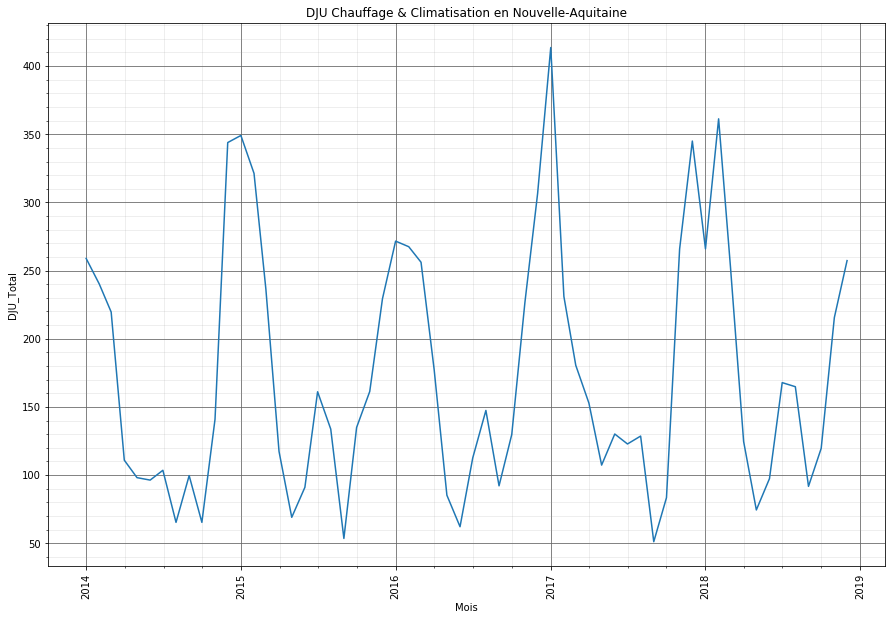

In [8]:
# Cumul des DJU Chauffage et Climatisation

DJU = pd.merge(Chauf_dju, Clim_dju)             # merge sur la colonne 'mois'
DJU['dju'] = DJU['dju_ch'] + DJU['dju_cl']      # culmul DJU chauffage et climatisation
DJU = DJU[['mois','dju']]                       
# DJU = DJU.loc[DJU["mois"] < '2019-01']          # année 2014 à 2018

fig = plt.figure(figsize = (15, 10))
plt.plot(DJU["mois"], DJU["dju"])
plt.title("DJU Chauffage & Climatisation en Nouvelle-Aquitaine")
plt.xlabel("Mois")
plt.ylabel("DJU_Total")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)
plt.show()

# DJU
# Les Degré Jour Unifié (DJU) qui mesure l'écart cumulé de la T°c par rapport à une températue de référence, ici 18°c, 
#   semblent également avoir une saisonnalité de 12 mois, avec 2 pics :
#     - un en Hiver plus accentué
#     - un en été plus faible.
# Normal puisque les températures se rapprochent plus de 18°c en été qu'en hiver d'ou un cumul moins important en été.


### Consommation d'électricité  /  DJU

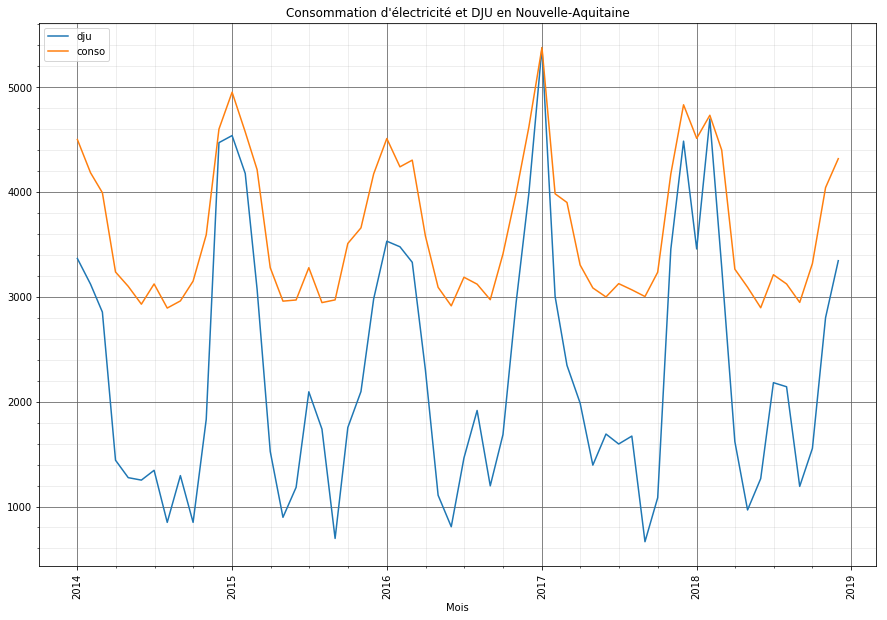

In [9]:
fig = plt.figure(figsize = (15, 10))
plt.plot(DJU["mois"], 13*DJU["dju"])                # 13*  -> pour faciliter la comparaison
plt.plot(energie["mois"], energie["conso"])
plt.title("Consommation d'électricité et DJU en Nouvelle-Aquitaine")
plt.xlabel("Mois")
# plt.ylabel("DJU_Total")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)
plt.legend(loc = 'upper left')
plt.show()

fig.savefig('consoVSdju', dpi=fig.dpi)

# Comme les graphiques précédents semblaient nous le montrer, La consommation énergétique et les DJU sont fortement corrélés.

# La valeur du Coef de Pearson (=0.96) confirme cette hypothèse,
#     mais comme le coef de Pearson ne détecte les relations que lorsqu'elles sont linéaires,
#       on peut toutefois tracer graphiquement la droite de régression linéaire pour s'en persuader un peu plus.
        

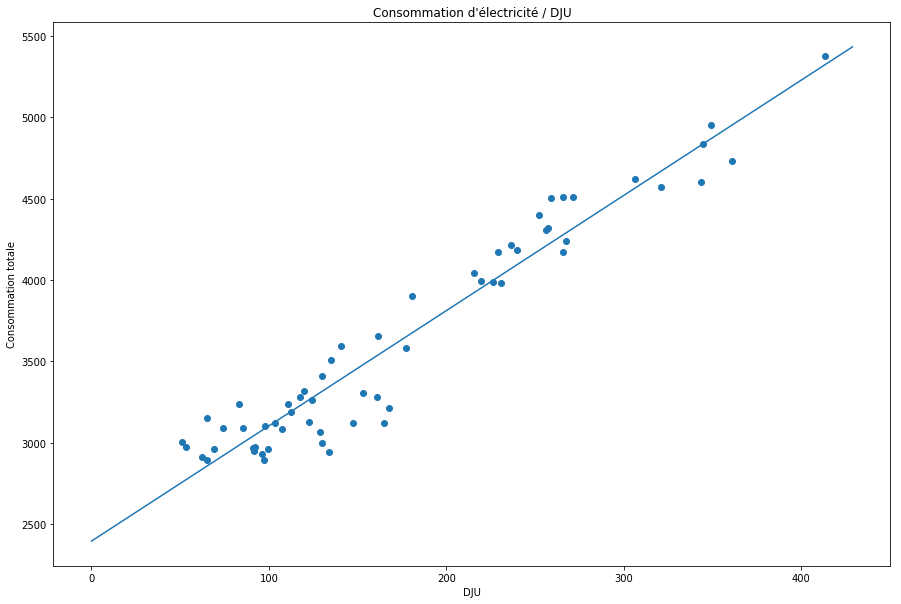

Coef de Pearson =  0.9641370451730983

Droite de régression de pente : 7.075455105274939
Ordonnée à l'origine          : 2395.9131071413713


In [11]:
DJU = DJU.infer_objects()

Y = energie["conso"]
X = DJU[["dju"]]
X = X.copy()         # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()                              # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['dju'],result.params['intercept']    # Estimation de a et b de la droite affine


fig = plt.figure(figsize = (15, 10))
plt.scatter(DJU["dju"], energie["conso"])
plt.title("Consommation d'électricité / DJU")
plt.xlabel("DJU")
plt.ylabel("Consommation totale")
plt.plot(np.arange(430),[a*x+b for x in np.arange(430)])
plt.show()


# Calcul du coeff de Pearson (=coefficient de corrélation linéaire):   = 0.9641370451730981  (forte corrélation)
print("Coef de Pearson = ",st.pearsonr(DJU["dju"],energie["conso"])[0])
# n.b :  Le coef de Pearson ne détecte les relations que lorsqu'elles sont linéaires, (r=1,-1) sinon r tend vers 0
#           c'est-à-dire lorsque les points sont plutôt bien alignés sur une ligne droite.
# Dans notre cas l’équation de régression linéaire est adaptée pour décrire la distribution des points.

print("\nDroite de régression de pente :", a)   # = 7.07545510527494
print("Ordonnée à l'origine          :", b)     # = 2395.9131071413713


In [19]:
# Merge sur la colonne 'mois' des dataframes 'Chauf_dju' et 'energie'

ConsoElec = pd.merge(DJU, energie)        
ConsoElec.reset_index()
ConsoElec = ConsoElec[['mois','dju','conso']]

ConsoElec

,mois,dju,conso
0,2014-01-01,258.9,4501
1,2014-02-01,240.1,4184
2,2014-03-01,219.6,3993
3,2014-04-01,110.9,3237
4,2014-05-01,98.1,3100
5,2014-06-01,96.3,2930
6,2014-07-01,103.5,3123
7,2014-08-01,65.3,2893
8,2014-09-01,99.6,2961
9,2014-10-01,65.3,3150


## Conditions d'application de la régression linéaire : Tests préliminaires

In [20]:
regr = smf.ols('conso~dju', data=ConsoElec).fit()   # LOIC
print("\n\n",regr.summary())
print("\n")
print(sm.stats.anova_lm(regr, typ=2))

model_fitted_y = regr.fittedvalues                                       # model values
model_residuals = regr.resid                                             # model residuals


# 1. NON-AUTOCORRELATION (Indépendance des résidus) :  Durbin Watson
dw = statsmodels.stats.stattools.durbin_watson(model_residuals)
print("\nDurbin Watson Statistique :", dw)
# Si dw=2 alors les résidus ne sont pas corrélés et sont indépendants
#  1.642 => Légère autocorrélation positive


# 2. HOMOSCEDASTICITE (Homogénéité des résidus) :  Bruesch-Pagan
test = sms.het_breuschpagan(regr.resid, regr.model.exog)
print("\nTest de Breusch-Pagan / Cook Weisberg :", test)
# ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
# ['0.360'                        , '0.548'  , '0.350'  , '0.556']
# Avec p_value=0.548, Le test n'est pas significatif => les données ne violent pas l'hypothèse d'homoscédasticité.
# (0.36020408170215124, 0.5483929155999663, 0.3503002721093299, 0.556243334658035)
# p_value=0.548 =>Le test ne rejette pas H0 l’hypothèse d’homogénéité.


# 3. Normalité des résidus :  Shapiro Wilk
# print("\nShapiro - Normalité des résidus  :  ",st.shapiro(model_residuals),"\n")
# Shapiro - Normalité des résidus  :   (0.96, 0.072) => pas normale
# Le test n'est pas significatif, la distribution suit une loi normale.  (p_value=0.072 > 5%)
# La p-value > 5 % ce qui nous amène à accepter l’hypothèse H0 : les résidus sont normalement distribués.
print("Kolmogorov-Smirnov :  ",ks_2samp(model_residuals, list(np.random.normal(np.mean(model_residuals), np.std(model_residuals), 1000))))
# (statistic=0.130, pvalue=0.84) => normale
# Kolmogorov-Smirnov :   Ks_2sampResult(statistic=0.08066666666666661, pvalue=0.8399311449222661)
# La p-value > 5 % ce qui nous amène à accepter l’hypothèse H0 : les résidus sont normalement distribués.

# Intercept=   2395.9131  <- Ordonnée à l'origine
# dju=         7.0755     <- pente

# Au niveau de test de 5%, le modèle est significatif. Il a un bon pouvoir explicatif sur les données (R² : 93%), 
#  mais le pouvoir prédictif pourrait être entaché par l’instabilité du coefficient b et une variance résiduelle importante.
# F-statistic=765.4  et  P-value=4.17e-35

# Question le pouvoir prédictif pourrait être entaché par l’instabilité du coefficient b et une variance résiduelle importante.

# CONCLUSION :  Les hypothèses de validité sont vérifiées pour la régression linéaire.

# dw



                             OLS Regression Results                            
Dep. Variable:                  conso   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     765.4
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           4.17e-35
Time:                        23:24:21   Log-Likelihood:                -395.40
No. Observations:                  60   AIC:                             794.8
Df Residuals:                      58   BIC:                             799.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2395.9131     50.147     47.778      

## Correction des données de consommation mensuelles de l'effet température en utilisant une régression linéaire

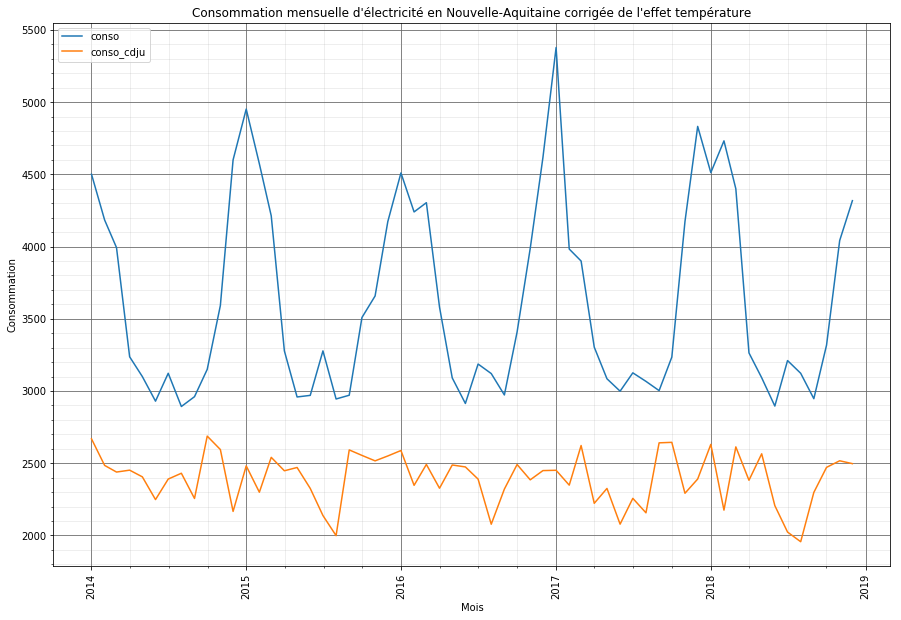

In [21]:
#     Consommation électrique corrigée des DJU  (2014, 2015, 2016, 2017, 2018)

# (a) Droite de régression, pente = 7.0755
# (b) Ordonnée à l'origine        = 2396
a = a.round(4)
b = b.round()                     # CONSO = a.DJU + b

ConsoElec['conso_cdju'] = ConsoElec['conso'] - a*ConsoElec['dju']   #  <-- CORRECTION

# Représentation  Consommation élect. / Consommation élect. corrigée
fig = plt.figure(figsize = (15, 10))
plt.plot(ConsoElec["mois"], ConsoElec["conso"])
plt.plot(ConsoElec["mois"], ConsoElec["conso_cdju"])
plt.title("Consommation mensuelle d'électricité en Nouvelle-Aquitaine corrigée de l'effet température")
plt.xlabel("Mois")
plt.ylabel("Consommation")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)
plt.legend(loc = 'upper left')
plt.show()

fig.savefig('consoCorrigDJU', dpi=fig.dpi)
# Chauf_dju

# Le graphique présente la consommation énergétique corrigée de l'effet de température. 
# Elle se situe aux alentours des 2400 MW, ce qui est cohérent avec l'intercept calculé.
# Cette nouvelle série temporelle a une saisonnalité constante au cours du temps. Elle est donc de type additif.
# La tendance semble àpriori stable

## Désaisonnalisation de la consommation (corrigée de l'effet température) avec les Moyennes Mobiles

In [22]:
# Préparation de l'index de Chauf_dju avant la correction par les Moyennes Mobiles

ConsoElec = ConsoElec.set_index("mois")                  # 'mois' de type 'datetime64' doit être l'index

# Chauf_dju.index.inferred_freq                          # 'inferred_freq' est necessaire 
# L'index de type 'datetime' permet d'avoir "Chauf_dju.index.inferred_freq" nécessaire pour la fonction seasonal_decompose()

# ConsoElec


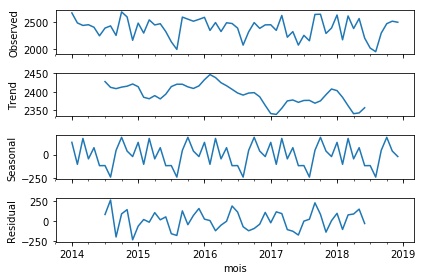

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# fig = plt.figure(figsize = (15, 10))
decomp_conso = seasonal_decompose(ConsoElec["conso_cdju"],  model='additive')
# decomp_conso = seasonal_decompose(Chauf_dju["conso_corri"],  model='additive', extrapolate_trend='freq', freq=12)
decomp_conso.plot()
plt.show()
# fig.savefig('consoDecompo', dpi=fig.dpi)



# seasonal_decompose()  paramètres ?
# Oui, parce qu'on voit que les 6 premières&dernières valeurs de decomp_conso.resid sont = 'nan'.  Ca veut dire que la 1ere 
#      moyenne mobile se calcule sur les 12 premières valeurs. Comment changer ce paramètres ?
# two_sided : bool
#   The moving average method used in filtering. If True (default), 
#   a centered moving average is computed using the filt. If False, the filter coefficients are for past values only.

# decomp_conso.resid = decomp_conso.resid[6:54]   # Pour supprimer les 6 premières et 6 dernières valeurs 'NAN' qui font
                                                  #      planter la fonction acorr_ljungbox(()
# decomp_conso.trend a aussi des valeurs 'NAN' du à l'application de la méthode des moyennes mobiles


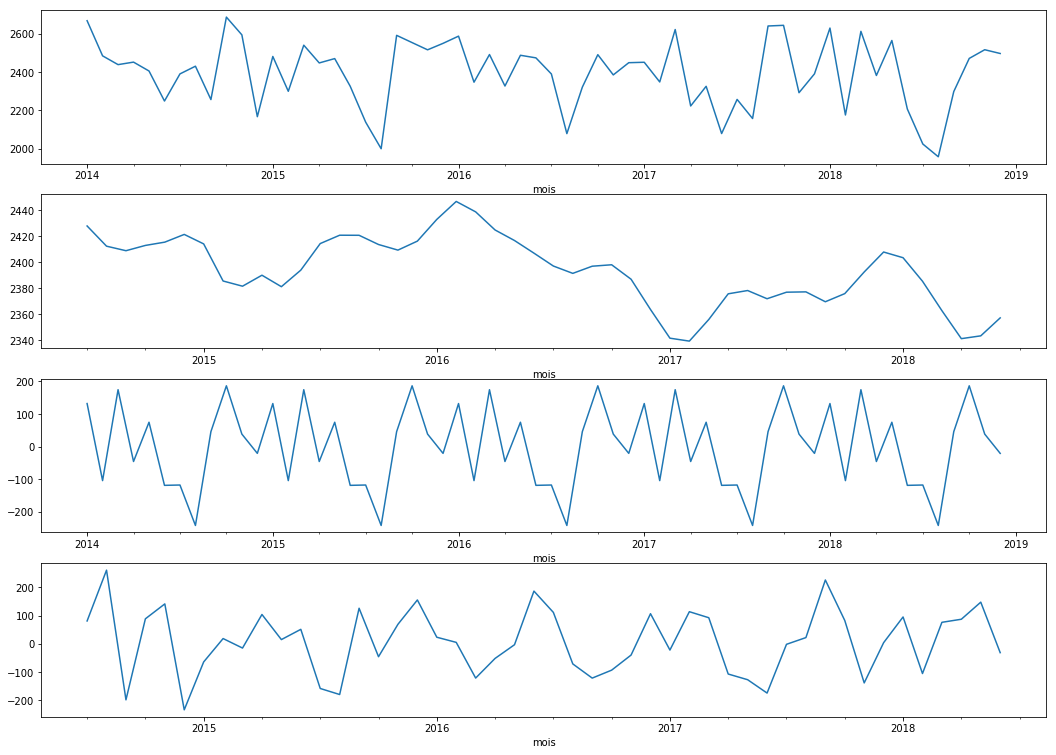

In [24]:
import matplotlib.pyplot as plt 

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(18,13))
decomp_conso.observed.plot(ax=ax1)
decomp_conso.trend.plot(ax=ax2)
decomp_conso.seasonal.plot(ax=ax3)
decomp_conso.resid.plot(ax=ax4)

fig.savefig('decompo', dpi=fig.dpi)

# type(decomp_conso.observed)   # pandas.core.series.Series

# Les premières observations de la série nous montrent :
#   - une tendance générale décroissante
#   - une saisonnalité marquée sur l’année, avec un pic en décembre/Janvier et en juillet
#   - ainsi qu’une forte autocorrélation au lag 12 ???

# L’objectif de ce TP est de se ramener par différentiation à un processus stationnaire, que nous modéliserons.

### Test du bruit blanc

In [25]:
# Vérification que les résidus ne soient que du bruit blanc après décomposition par les moyennes mobiles


# Test Q de Ljung-Box:  L'hypothèse nulle (H0) stipule qu'il n'y a pas auto-corrélation des résidus d'ordre 1 à r.
#                       L'hypothèse de recherche (H1) stipule qu'il y a auto-corrélation des erreurs d'ordre 1 à r.      
#
# La statistique Q de Ljung-Box (LBQ) est une statistique de test,
#    qui permet de déterminer si toutes les autocorrélations jusqu'à un décalage spécifique (inclus) sont nulles. 
# Si le LBQ est supérieur à une valeur critique donnée, vous pouvez conclure que l'autocorrélation n'est pas égale à 0.
#
# Lorsque le processus est bien estimé, les résidus entre les valeurs observées et les valeurs
#           estimées par le modèle doivent se comporter comme un bruit blanc.
# Si les résidus obéissent à un bruit blanc, il ne doit pas exister d’autocorrélation dans la série.


from statsmodels.stats.diagnostic import acorr_ljungbox

print("\nacorr_ljungbox : p_value=", acorr_ljungbox(decomp_conso.resid[6:54], lags=[1], boxpierce=False)[1])
# p_value= [0.78590186] => On ne rejette pas H0 au niveau de test α donc les résidus sont un bruit blanc.

acorr_ljungbox(decomp_conso.resid[6:54], lags=[1], boxpierce=False)

# Les résidus sont bien un bruit blanc, la tendance et la saisonnalité ont donc bien été modélisés


acorr_ljungbox : p_value= [0.78590186]


(array([0.07378615]), array([0.78590186]))

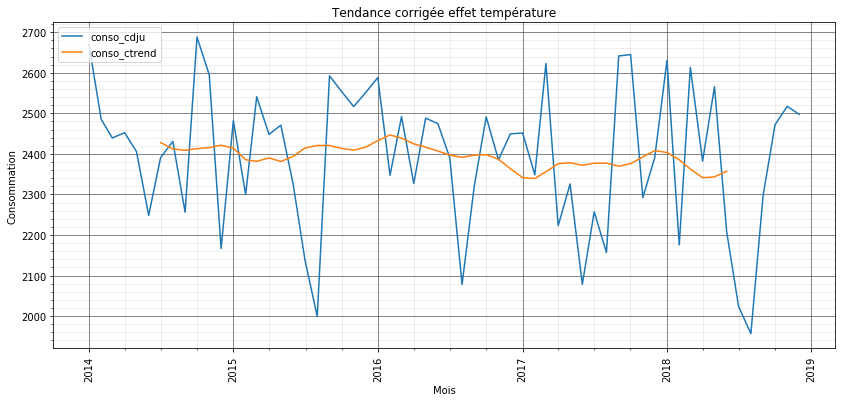

In [26]:
# Consommation (corrigée de l'effet température) désaisonnalisée =
#       Consommation (corrigée de l'effet température) - saisonnalité
ConsoElec["conso_cvs"]    = ConsoElec["conso_cdju"] - decomp_conso.seasonal

ConsoElec["conso_ctrend"] = decomp_conso.trend   # Tendance corrigée effet température

fig = plt.figure(figsize = (14, 6))
plt.plot(ConsoElec.index, ConsoElec["conso_cdju"])
plt.plot(ConsoElec.index, ConsoElec["conso_ctrend"])
plt.title("Tendance corrigée effet température")
plt.xlabel("Mois")
plt.ylabel("Consommation")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)
plt.legend(loc = 'upper left')
plt.show()

fig.savefig('tendance', dpi=fig.dpi)


In [27]:
# Variation de la tendance

trend = ConsoElec["conso_ctrend"].dropna()
print("Varition de la tendance:  -",100-(100*trend[-1])/trend[0],"%" )

# trend[0]    # 1ere ligne: (2014-07-01)  2427
# trend[-1]   # dern ligne: 2018-06-01             2357  (2018-06-01)
# print(trend.head(1))    # 1ere ligne: 2014-07-01    2427  
# print(trend.tail(1))   # dern ligne: 2018-06-01    2357.215244

# Sur la période, la tendance de la consommation énergétique a diminué de 2.91 %

Varition de la tendance:  - 2.9103331338990586 %


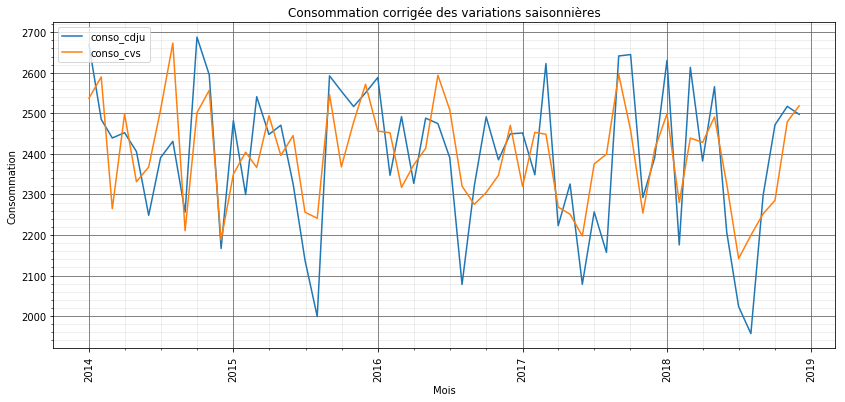

In [28]:
# Consommation corrigée des variations saisonnières (CVS)

ConsoElec["conso_cvs"]    = ConsoElec["conso_cdju"] - decomp_conso.seasonal
ConsoElec["conso_ctrend"] = decomp_conso.trend

fig = plt.figure(figsize = (14, 6))
plt.plot(ConsoElec.index, ConsoElec["conso_cdju"])
plt.plot(ConsoElec.index, ConsoElec["conso_cvs"])
plt.title("Consommation corrigée des variations saisonnières")
plt.xlabel("Mois")
plt.ylabel("Consommation")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)
plt.legend(loc = 'upper left')
plt.show()

fig.savefig('consoCVS', dpi=fig.dpi)


# Prévision de la consommation (corrigée de l'effet température) sur un an
### Méthode de Holt Winters (lissage exponentiel)

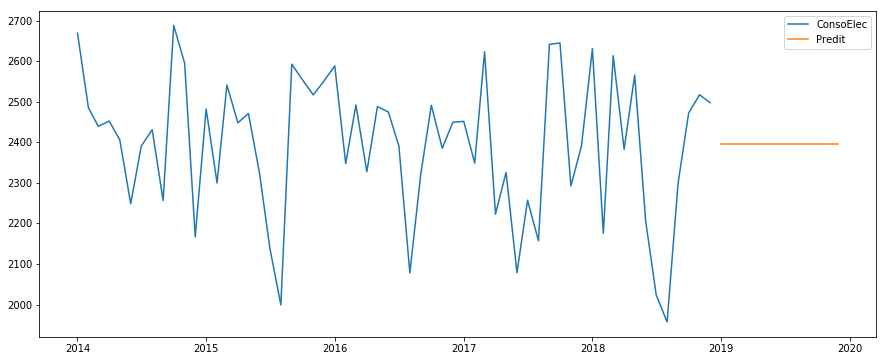

In [29]:
# avec ... le lissage exponentiel simple

from statsmodels.tsa.api import ExponentialSmoothing

les = ExponentialSmoothing(np.asarray(ConsoElec["conso_cdju"]), trend=None, seasonal=None).fit()
les_pred = les.forecast(12)

fig = plt.figure(figsize = (15, 6))
plt.plot(ConsoElec["conso_cdju"], label='ConsoElec')
plt.plot(pd.date_range(ConsoElec.index[len(ConsoElec)-1], periods=12, freq='M'), les_pred, label='Predit')
plt.legend()
plt.show()
fig.savefig('LissExpoSimple', dpi=fig.dpi)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


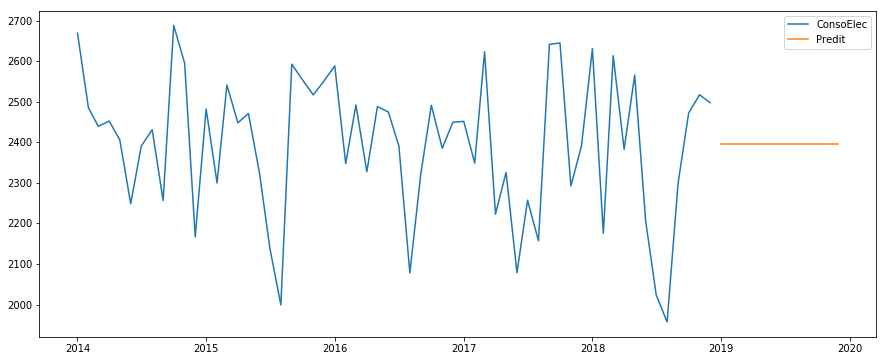

In [30]:
# avec ... le lissage exponentiel double

les = ExponentialSmoothing(np.asarray(ConsoElec["conso_cdju"]), trend='add', seasonal=None).fit()
les_pred = les.forecast(12)

fig = plt.figure(figsize = (15, 6))
plt.plot(ConsoElec["conso_cdju"], label='ConsoElec')
plt.plot(pd.date_range(ConsoElec.index[len(ConsoElec)-1], periods=12, freq='M'), les_pred, label='Predit')
plt.legend()
plt.show()
fig.savefig('LissExpoDouble', dpi=fig.dpi)


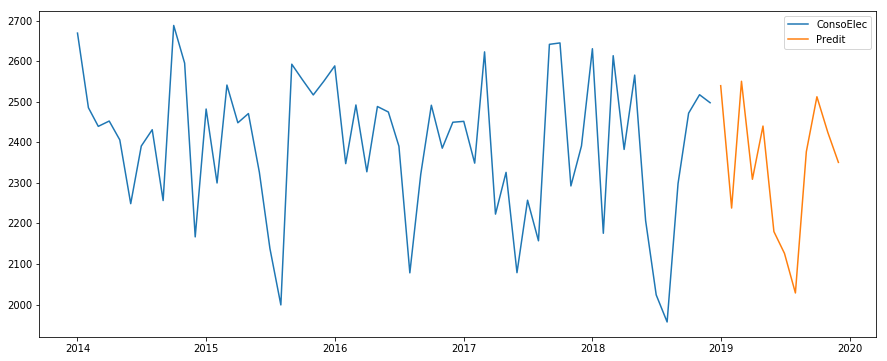

In [31]:
# avec ... la méthode de Holt-Winters :

hw = ExponentialSmoothing(np.asarray(ConsoElec["conso_cdju"]), seasonal_periods=12, trend='add', seasonal='add').fit()

hw_pred = hw.forecast(12)

fig = plt.figure(figsize = (15, 6))
plt.plot(ConsoElec["conso_cdju"], label='ConsoElec')
plt.plot(pd.date_range(ConsoElec.index[len(ConsoElec)-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()
plt.show()
fig.savefig('Holt-Winters', dpi=fig.dpi)

# La méthode de Holt-Winters permet à présent d'intégrer la saisonnalité. 
# Nous avons donc un niveau + une tendance + une saisonnalité.



### Evaluation de Holt winters

RMSE =  155.23106052244535
AIC  =  514.5224801640969
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                        1114317.515
Optimized:                         True   AIC                            514.522
Trend:                         Additive   BIC                            544.462
Seasonal:                      Additive   AICC                           538.109
Seasonal Periods:                    12   Date:                 Mon, 30 Dec 2019
Box-Cox:                          False   Time:                         23:25:14
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0526311               

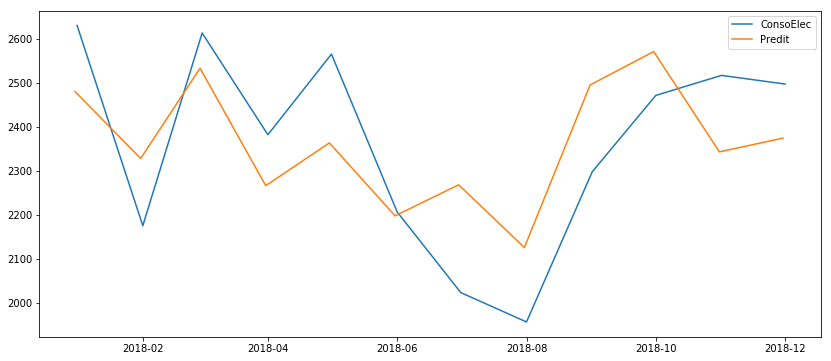

In [32]:
# TRAINING sur 2014 à 2017 /  PREDICTION pour 2018

# Entrainement du modèle sur les années 2014 à 2017 => train. Comparaison observé/prévision sur l'année 2018 => test
train, test = ConsoElec.iloc[:48], ConsoElec.iloc[48:]

# TRAINING sur 2014 à 2017
hw = ExponentialSmoothing(np.asarray(train["conso_cdju"]), seasonal_periods=12, trend='add', seasonal='add').fit()

# PREDICTION pour 2018
hw_pred = hw.forecast(12)

# Représentation de la consommation réelle et prédite en 2018 
plt.figure(figsize=(14,6))
plt.plot(test["conso_cdju"], label='ConsoElec')
plt.plot(pd.date_range(train.index[len(train)-1], periods=12, freq='M'), hw_pred, label='Predit')
plt.legend()


# Erreur quadratique moyenne (RMSE)
from sklearn.metrics import mean_squared_error
#                        mean_squared_error(Y, Y_predict)
print('RMSE = ', np.sqrt(mean_squared_error(ConsoElec["conso_cdju"][48:60], hw_pred)))
print("AIC  = ",hw.aic)   # = 514.522

print(hw.summary())

In [33]:
def plot_sortie_acf( y_acf, y_len, pacf=False):
    "représentation de la sortie ACF"
    if pacf:
        y_acf = y_acf[1:]
    fig = plt.figure(figsize=(14,6))
    plt.bar(range(len(y_acf)), y_acf, width = 0.1)
    plt.xlabel('lag')
    if pacf:
        plt.ylabel('PACF')
    else:
        plt.ylabel('ACF')
    plt.axhline(y=0, color='black')
    plt.axhline(y=-1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=0.8)
    plt.axhline(y=1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=0.8)
    plt.ylim(-1, 1)
    plt.show()
    fig.savefig("plot_sortie_acf", dpi=fig.dpi)
    return

## Prévision de la consommation (corrigée de l'effet température) sur un an
## Méthode SARIMA

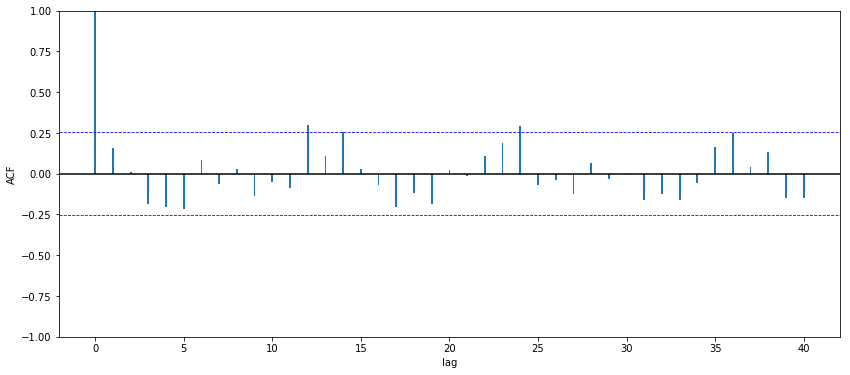

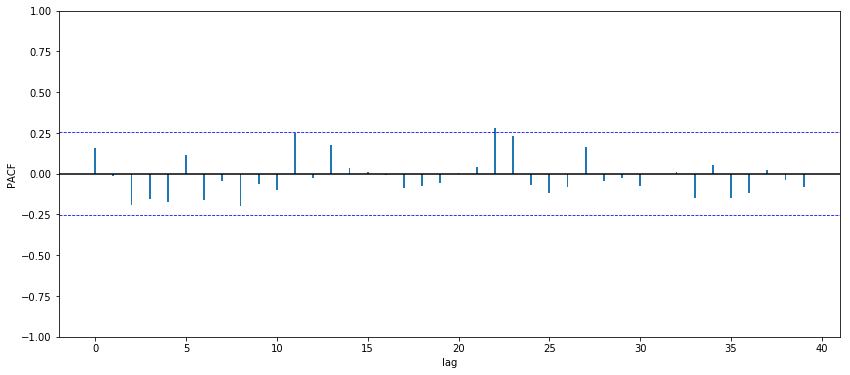

In [34]:

# Série Stationnaire ? :  Appréciation 'graphique' avec la sortie ACF

from statsmodels.tsa.stattools import acf, pacf
# from functions import plot_sortie_acf

y_len = len(ConsoElec["conso_cdju"])   # variable nécessaire pour l'utilisation de plot_sortie_acf = 60

# ACF
plot_sortie_acf(acf(ConsoElec["conso_cdju"], fft=False), y_len)

# PACF
plot_sortie_acf(pacf(ConsoElec["conso_cdju"], method='ywm'), y_len, pacf=True)
# (method='ywm' :  Yule-Walker without bias correction)
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html


In [35]:
from pmdarima.arima.stationarity import ADFTest

# Test whether we should difference at the alpha=0.05
# significance level
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(ConsoElec["conso_cdju"])  # (0.01, False)
print("Doit-on différencier la série ?  ",p_val,", ",should_diff)   # 0.01 ,  False => On ne doit pas différencier


from pmdarima.arima.utils import ndiffs

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(ConsoElec["conso_cdju"], test='adf')  # -> 0
print("n_adf: ", n_adf)

# Or a KPSS test (auto_arima default):
n_kpss = ndiffs(ConsoElec["conso_cdju"], test='kpss')  # -> 0
print("n_kpss:", n_kpss)

# Or a PP test:
n_pp = ndiffs(ConsoElec["conso_cdju"], test='pp')  # -> 0
assert n_adf == n_kpss == n_pp == 0
print("n_pp:  ", n_pp)

# Conclusion :  Différenciation pas obligatoire


from pmdarima.datasets import load_lynx
from pmdarima.arima.utils import nsdiffs

# estimate number of seasonal differences using a Canova-Hansen test
D = nsdiffs(ConsoElec["conso_cdju"],
            m=10,  # commonly requires knowledge of dataset
            max_D=12,
            test='ch')  # -> 0
print("\nCanova-Hansen, D= ", D)

# or use the OCSB test (by default)
D = nsdiffs(ConsoElec["conso_cdju"],
        m=10,
        max_D=12,
        test='ocsb')  # -> 0
print("OCSB,          D= ", D)

# Conclusion :  Différenciation saisonnière pas obligatoire



# ADF  test   # Différenciation -> pas nécessaire
# KPSS test   # Différenciation -> pas nécessaire
# PP   test   # Différenciation -> pas nécessaire

# Canova-Hansen test   # Différenciation saisonnière -> pas nécessaire
# OCSB          test   # Différenciation saisonnière -> pas nécessaire

Doit-on différencier la série ?   0.01 ,  False
n_adf:  0
n_kpss: 0
n_pp:   0

Canova-Hansen, D=  0
OCSB,          D=  0


In [36]:
# Série Stationnaire ?  Test de Dickey-Fuller

from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ConsoElec["conso_cdju"], autolag='AIC')      # Test statistic = -2.087;  P-value = 0.250

print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

# H0 : processus non stationnaire
# Ici on a :  P-value = 0.250 => non-stationnarité de la série
#
# La série semblait stationnaire mais ne l'est pas statistiquement


Test statistic = -2.087
P-value = 0.250
Critical values :
	1%: -3.5745892596209488 - The data is not stationary with 99% confidence
	5%: -2.9239543084490744 - The data is not stationary with 95% confidence
	10%: -2.6000391840277777 - The data is not stationary with 90% confidence


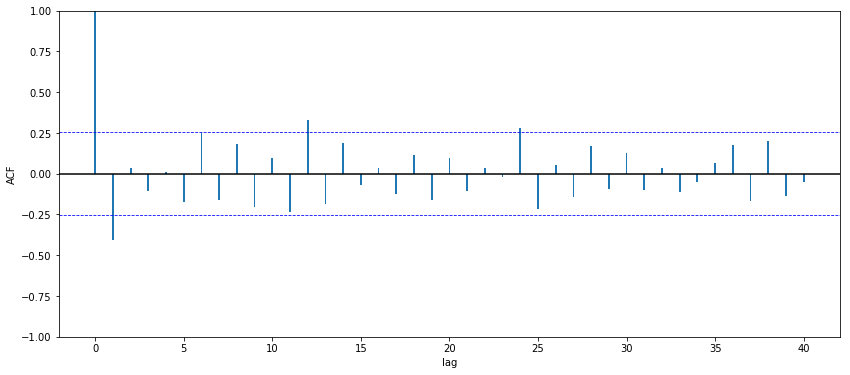

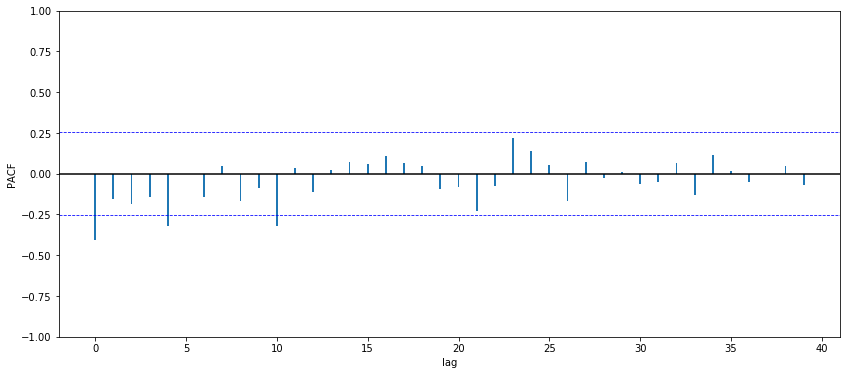

Test statistic = -5.412
P-value = 0.000
Critical values :
	1%: -3.5745892596209488 - The data is  stationary with 99% confidence
	5%: -2.9239543084490744 - The data is  stationary with 95% confidence
	10%: -2.6000391840277777 - The data is  stationary with 90% confidence


In [37]:
# Différenciation d'ordre 1 pour améliorer la stationnarité
y_dif_1 = ConsoElec["conso_cdju"] - ConsoElec["conso_cdju"].shift(1)
plot_sortie_acf(acf(y_dif_1[1:], fft=False), y_len)
plot_sortie_acf(pacf(y_dif_1[1:], method='ywm'), y_len, pacf=True)

# Série Stationnaire ?  Test de Dickey-Fuller
y_dif_1 = ConsoElec["conso_cdju"] - ConsoElec["conso_cdju"].shift(1)
dftest = adfuller(y_dif_1[1:], autolag='AIC')      # Test statistic = -5.412;  P-value = 0.000 => série stationnaire

print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

# Le test confirme la stationnarité de la série. On peut donc passer à la phase d'identification de modèles potentiels 
#    c'est à dire l'observation de ρ(h) et r(h).

# Attention :  Vu l'ACF, le décalage pénètre assez rapidement dans la zone négative, 
#                           ce qui indique que la série peut avoir été surdifférenciée !
# Donc on revient en arrière, c'est à dire qu'on ne différencie pas même si la série a alors une faible stationnarité.


### Identification de modéle, estimation et validation de modèles

### Recherche du meilleur modèle

In [38]:
#   --- Recherche par itération de la combinaison des paramètres (p, d, q) et (P, D, Q)  ---

import itertools
import warnings
from collections import OrderedDict

# Définit les paramètres (p, d, q) qui prennent leur valeur entre 0 et MAX-1
MAX=2
p=d=q = range(0, MAX)

# Génère toutes les combinaisons de triplets (p, d, q)
pdq = list(itertools.product(p, d, q))

# Génère toutes les combinaisons de triplets saisonniers (P, D, Q)
seasonal_PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

dic_aic = {}

warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_PDQ:
        try:
            mod = sm.tsa.statespace.SARIMAX(train["conso_cdju"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            dic_aic[results.aic] = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)
        except:
            continue


d2 = OrderedDict(sorted(dic_aic.items(), key=lambda t: t[0]))
for k, v in d2.items():
    print("{:>3f} : {:<s}".format(k, v))
    
# Pour MAX=2 le meilleur AIC= 286 :  ARIMA(1, 1, 1)x(1, 1, 0, 12)12
# Pour MAX=3 le meilleur AIC= 139 :  ARIMA(1, 1, 0)x(2, 1, 0, 12)12


286.308313 : ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:286.30831297154646
289.636720 : ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:289.63672019829863
293.837812 : ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:293.83781249164366
294.697222 : ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:294.6972223199592
299.699544 : ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:299.6995435397553
301.696291 : ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:301.6962912166117
304.507399 : ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:304.5073994716602
306.993393 : ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:306.9933933720466
445.656212 : ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:445.65621225603235
446.527109 : ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:446.527108726256
450.614647 : ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:450.61464716069815
450.873422 : ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:450.8734223251943
453.909581 : ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:453.9095810059423
454.355675 : ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:454.3556749502798
459.578928 : ARIMA(0, 0, 1)x(1, 0, 1, 12)12 

In [61]:
#   --- AUTO ARIMA ---

import pmdarima as pm
# print(pm.__file__)   # C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\__init__.py


# 1. Recherche du plus petit AIC en faisant varier d et D (ordre de différenciation simple et saisonnier) de 0 à 2

# model = pm.auto_arima(train["conso_cdju"], seasonal=True, m=12)
# print(model.summary())
# print("AIC corrigé =", model.aicc())
# print("........................................................................................\n\n")
# # SARIMAX(0, 0, 0)x(0, 0, 1, 12)   AIC= 628  MAIS ma.S.L12 non significatif

# model = pm.auto_arima(train["conso_cdju"], seasonal=True, m=12, d=1)
# print(model.summary())
# print("AIC corrigé =", model.aicc())
# print("........................................................................................\n\n")
# # SARIMAX(2, 1, 2)x(2, 0, 0, 12)   AIC= 616  MAIS ar.L2, ar.S.L12 non significatif

# model = pm.auto_arima(train["conso_cdju"], seasonal=True, m=12, d=2)
# print(model.summary())
# print("AIC corrigé =", model.aicc())
# print("........................................................................................\n\n")
# # SARIMAX(2, 2, 2)x(2, 0, 0, 12)   AIC= 617  MAIS ar.L1-2, ar.S.L12-24 non significatif

# model = pm.auto_arima(train["conso_cdju"], seasonal=True, m=12, D=1)
# print(model.summary())
# print("AIC corrigé =", model.aicc())
# print("........................................................................................\n\n")
# # SARIMAX(0, 0, 0)x(1, 1, 0, 12)   AIC= 474

# model = pm.auto_arima(train["conso_cdju"], seasonal=True, m=12, D=2)
# print(model.summary())
# print("AIC corrigé =", model.aicc())
# print("........................................................................................\n\n")
# # SARIMAX(1, 0, 2)x(1, 2, 0, 12)   AIC= 341   MAIS ar.L1, ma.L1-2   non significatif 

# model = pm.auto_arima(train["conso_cdju"], seasonal=True, m=12, d=1, D=1)
# print(model.summary())
# print("AIC corrigé =", model.aicc())
# print("........................................................................................\n\n")
# # SARIMAX(1, 1, 1)x(1, 1, 0, 12)   AIC= 470   MAIS ar.L1, ma.L1  non significatif

# model = pm.auto_arima(train["conso_cdju"], seasonal=True, m=12, d=2, D=2)
# print(model.summary())
# print("AIC corrigé =", model.aicc())
# print("........................................................................................\n\n")
# # SARIMAX(1, 2, 1)x(1, 2, 0, 12)   AIC= 326   MAIS ar.L1  non significatif

# model = pm.auto_arima(train["conso_cdju"], seasonal=True, m=12, d=1, D=2)
# print(model.summary())
# print("AIC corrigé =", model.aicc())
# print("........................................................................................\n\n")
# # SARIMAX(0, 1, 1)x(1, 2, 0, 12)   AIC= 333   MAIS ma.L1   non significatif

# model = pm.auto_arima(train["conso_cdju"], seasonal=True, m=12, d=2, D=1)
# print(model.summary())
# print("AIC corrigé =", model.aicc())
# print("........................................................................................\n\n")
# # SARIMAX(2, 2, 1)x(1, 1, 0, 12)   AIC= 472   MAIS ar.L2, ma.L1  non significatif

# 1. Modèles retenus :
# SARIMAX(0, 0, 0)x(0, 0, 1, 12)   AIC= 628  MAIS ma.S.L12 non significatif
# SARIMAX(2, 1, 2)x(2, 0, 0, 12)   AIC= 616  MAIS ar.L2, ar.S.L12 non significatif
# SARIMAX(2, 2, 2)x(2, 0, 0, 12)   AIC= 617  MAIS ar.L1-2, ar.S.L12-24 non significatif
# SARIMAX(0, 0, 0)x(1, 1, 0, 12)   AIC= 474
# SARIMAX(1, 0, 2)x(1, 2, 0, 12)   AIC= 341   MAIS ar.L1, ma.L1-2   non significatif 
# SARIMAX(1, 1, 1)x(1, 1, 0, 12)   AIC= 470   MAIS ar.L1, ma.L1  non significatif
# SARIMAX(1, 2, 1)x(1, 2, 0, 12)   AIC= 326   MAIS ar.L1  non significatif
# SARIMAX(0, 1, 1)x(1, 2, 0, 12)   AIC= 333   MAIS ma.L1   non significatif
# SARIMAX(2, 2, 1)x(1, 1, 0, 12)   AIC= 472   MAIS ar.L2, ma.L1  non significatif




# 2. Recherche du plus petit AIC en faisant varier d(None, 1), avec D=1
# ------------------------------------------------------------------------------------------------------
model = pm.auto_arima(train["conso_cdju"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         #d=None,
                         d=1,
                         D=1, trace=True,   # D=1 à cause de la saisonnalité
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
model.summary()
# 2. Modèles retenus :
# SARIMAX(0, 0, 0)x(1, 1, 0, 12)   AIC= 474  RMSE=      avec d=None, D=1
# SARIMAX(1, 1, 1)x(1, 1, 0, 12)   AIC= 470  RMSE=      avec d=1, D=1

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=487.085, BIC=490.195, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=481.537, BIC=487.759, Fit time=0.180 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=485.093, BIC=486.648, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=486.395, BIC=491.061, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=483.286, BIC=491.063, Fit time=0.502 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=na

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -230.224
Date:                            Sun, 29 Dec 2019   AIC                            470.447
Time:                                    14:30:39   BIC                            478.224
Sample:                                         0   HQIC                           473.132
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3078      4.178     -0.074      0.941      -8.497       7.881
ar.L1          0.0943      0.205      0.461      0.645      -0.307       0.495
ma.L1         -0.9993     28.754     -0.035      0.972     -57.356      55.357
ar.S.L12      -0.5708      0.189     -3.016      0.003      -0.942      -0.200
sigma2      2.368e+04   6.79e+05      0.035      0.972   -1.31e+06    1.35e+06
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.64
Prob(Q):                               nan   Prob(JB):                         0.73
Heteroskedasticity (H):               0.55   Skew:                             0.31
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Choix des ordres (p,d,q), (P,D,Q)x  du modèle

In [44]:
# ---  order=(p,d,q), seasonal_order=(P,D,Q) 12  ---

#           !!!  Il faut décommenter la ligne du modèle à tester, puis exécuter la cellule  !!!

# MANUEL (ACF-PACF)
# p=0;d=0;q=0; P=1;D=1;Q=2      # SARIMA(0, 0 ,0)x(1, 1, 2)  KO
# p=0;d=0;q=0; P=1;D=1;Q=1      # SARIMA(0, 0 ,0)x(1, 1, 1)  KO
# p=0;d=0;q=0; P=0;D=1;Q=2      # SARIMA(0, 0, 0)x(0, 1, 2)  KO
# p=0;d=1;q=1; P=0;D=1;Q=2      # SARIMA(0, 1 ,1)x(0, 1, 2)  KO
# p=0;d=1;q=1; P=0;D=1;Q=1      # SARIMA(0, 1 ,1)x(0, 1, 1)  KO


# AUTO ARIMA (pmdarima) :
# p=0;d=0;q=0; P=1;D=1;Q=0      # ARIMA(0, 0, 0)x(1, 1, 0)     AIC= 306     RMSE= 155
# p=1;d=1;q=1; P=1;D=1;Q=0      # ARIMA(1, 1, 1)x(1, 1, 0)     AIC= 286     RMSE= 160   MAIS ar.L1   non significatif
# p=0;d=1;q=1; P=1;D=2;Q=0      # ARIMA(0, 1, 1)x(1, 2, 0)     AIC= 153     RMSE= 346   MAIS ma.L1   non significatif
# p=1;d=2;q=1; P=1;D=2;Q=0      # ARIMA(1, 2, 1)x(1, 2, 0)     AIC= 132     RMSE= 365   MAIS ar.L1, ma.L1  non significatif
# p=2;d=1;q=2; P=2;D=0;Q=0      # ARIMA(2, 1, 2)x(2, 0, 0)     AIC= 272     RMSE= 213   MAIS ma.L2, ar.S.L24 non significatif
# p=2;d=2;q=2; P=2;D=0;Q=0      # ARIMA(2, 2, 2)x(2, 0, 0)     AIC= 275     RMSE= 240   MAIS ar.L2, ma.L1-2, ar.S.L12-24 non significatif
# p=2;d=2;q=1; P=1;D=1;Q=0      # ARIMA(2, 2, 1)x(1, 1, 0)     AIC= 272     RMSE= 212   MAIS ar.L1-2, ma.L1, ar.S.L12  non significatif


# itération des combinaisons de paramètres (p, d, q) et (P, D, Q) :  ic
# p=1;d=1;q=1; P=1;D=1;Q=0      # ARIMA(1, 1, 1)x(1, 1, 0)     AIC= 286     RMSE= 160   MAIS ar.L1  non signif
p=1;d=1;q=0; P=2;D=1;Q=0      # ARIMA(1, 1, 0)x(2, 1, 0)     AIC= 139     RMSE= 161   MAIS ar.L1, ar.S.L12-24  non significatif



# -----------------------------------------------------------------
# Test de blancheur (bruit blanc) sur les résidus = BB
# normalité des résidus = NR
# Nombre de paramètres non significatif : NS


#  Modèles Pré-sélectionnés :                      AIC  RMSE  BB  NR   NS
# p=1;d=1;q=0; P=2;D=1;Q=0  # (1, 1, 0)x(2, 1, 0)  139  161   OK  KO   3 : ar.L1, ar.S.L12-24        ic     ***
# p=1;d=1;q=1; P=1;D=1;Q=0  # (1, 1, 1)x(1, 1, 0)  286  160   OK  KO   1 : ar.L1                     ic
# p=0;d=0;q=0; P=1;D=1;Q=0  # (0, 0, 0)x(1, 1, 0)  306  155   KO  KO                                 AUTO ARIMA
# p=0;d=1;q=1; P=1;D=2;Q=0  # (0, 1, 1)x(1, 2, 0)  153  346   OK  KO   1 : ma.L1                     AUTO ARIMA
# p=1;d=2;q=1; P=1;D=2;Q=0  # (1, 2, 1)x(1, 2, 0)  132  365   KO  KO   2 : ar.L1, ma.L1              AUTO ARIMA
# p=2;d=2;q=1; P=1;D=1;Q=0  # (2, 2, 1)x(1, 1, 0)  272  212   KO  OK   4 : ar.L1-2, ma.L1, ar.S.L12  AUTO ARIMA

#  Modèle sélectionné :                            AIC  RMSE  BB  NR  NS                
# p=1;d=1;q=0; P=2;D=1;Q=0  # (1, 1, 0)x(2, 1, 0)  139  161   OK  KO   3 : ar.L1, ar.S.L12-24        ic

# Option Holt winters :                            514  155 



### Statistiques du modèle SARIMA choisi

In [51]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox


model = SARIMAX(np.asarray(train["conso_cdju"]), order=(p,d,q), seasonal_order=(P,D,Q,12),   # LOIC ConsoElec train
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()
print(results.summary())
print("AIC corrigé =",results.aic)


# Significativité des paramètres :   Si P>|z| <  0.05  alors le paramètre est significatif


# Test de blancheur (bruit blanc) sur les résidus :
print('Retard : p-value')
for elt in [1,2,3,4,5,6,7,8,9,10,11,12,24]:
    print('{} : {}'.format(elt, acorr_ljungbox(results.resid, lags=elt)[1].mean()))
# Rappel : ljungbox teste l'autocorrelation des résidus :
#          L'hypothèse nulle (H0) stipule qu'il n'y a pas auto-corrélation des erreurs d'ordre 1 à r. 
#          L'hypothèse de recherche (H1) stipule qu'il y a auto-corrélation des erreurs d'ordre 1 à r.
#
# P-value < 5% pour un ordre => autocorrelation des erreurs pour cet ordre, 
# ou encore :  Le test de blancheur du résidu est validé au niveau 5% si p-value > 0.05


# -------------------------------------------------------------------------------------
# Alternative :  Test de normalité des résidus <=> Test de blancheur
from scipy.stats import shapiro
print("\nShapiro - model_residuals  :  ",shapiro(results.resid),"\n")
# (0.678, 3.42e-10) => pas normal

print("Kolmogorov-Smirnov :  ",ks_2samp(results.resid, list(np.random.normal(np.mean(results.resid), np.std(results.resid), 1000))))
# (statistic=0.174, pvalue=0.0566) => normale 
# (statistic=0.242, pvalue=0.002)  => pas normale
print("\n\n\n")


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 -65.707
Date:                            Mon, 30 Dec 2019   AIC                            139.414
Time:                                    23:31:13   BIC                            140.624
Sample:                                         0   HQIC                           138.086
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3527      1.057     -0.334      0.738      -2.423       1.718
ar.S.L12      -0.9523      1.653   

## Analyse a posteriori

La série est tronquée de l’année 2018, qu’on cherche ensuite à prévoir à partir de l’historique 2014-2017.

In [46]:
# TRAINING sur 2014 à 2017 /  PREDICTION pour 2018

ConsoElec_tronc     = ConsoElec[:'2017']   # jusqu'à 2017 inclus :  pour le training
ConsoElec_a_prevoir = ConsoElec['2018':]   # 2018                :  pour le test

# On vérifie que le modèle sur la série tronquée est toujours valide
modelTronc = SARIMAX(ConsoElec_tronc["conso_cdju"], order=(p,d,q), seasonal_order=(P,D,Q,12),
                                enforce_stationarity=False, enforce_invertibility=False)
resultsTronc = modelTronc.fit()
print(resultsTronc.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(resultsTronc.resid, lags=elt)[1].mean()))

print("\nKolmogorov-Smirnov :  ",ks_2samp(resultsTronc.resid, list(np.random.normal(np.mean(resultsTronc.resid), np.std(resultsTronc.resid), 1000))))
# Exemples :
# (statistic=0.174, pvalue=0.0566) => normale 
# (statistic=0.242, pvalue=0.002)  => pas normale

                                 Statespace Model Results                                 
Dep. Variable:                         conso_cdju   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 -65.707
Date:                            Mon, 30 Dec 2019   AIC                            139.414
Time:                                    23:29:34   BIC                            140.624
Sample:                                01-01-2014   HQIC                           138.086
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3527      1.057     -0.334      0.738      -2.423       1.718
ar.S.L12      -0.9523      1.653   

RMSE =  161.0


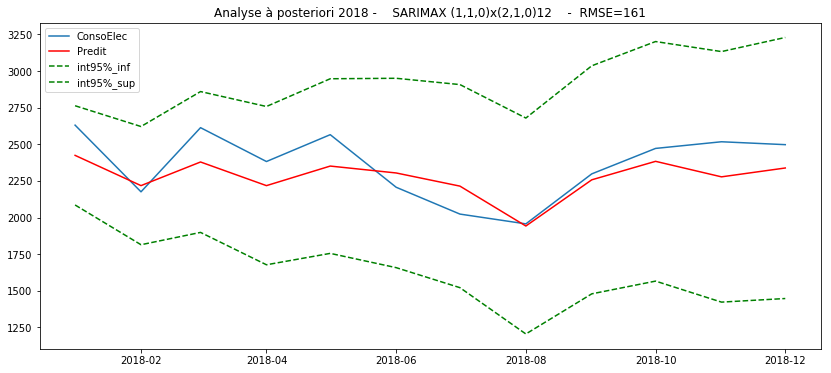

In [47]:
pred_modelTronc = resultsTronc.get_forecast(12)

pred_tronc   = pred_modelTronc.predicted_mean
pred_l_tronc = pred_modelTronc.conf_int()["lower conso_cdju"]
pred_u_tronc = pred_modelTronc.conf_int()["upper conso_cdju"]

# Calcul du RMSE
rmse = np.sqrt(((ConsoElec_a_prevoir['conso_cdju'] - pred_tronc)**2).mean())
rmse = rmse.round() 
print('RMSE = ', rmse)

# mape=(np.abs(1-pred_tronc/ConsoElec_a_prevoir['conso_cdju'])).mean()*100
# print('MAPE = ', mape)

fig = plt.figure(figsize=(14,6))
plt.plot(ConsoElec_a_prevoir.conso_cdju, label='ConsoElec')
plt.plot(ConsoElec_a_prevoir.index, pred_tronc, color='r', label='Predit')
plt.plot(ConsoElec_a_prevoir.index, pred_l_tronc, color='g', linestyle='--', label='int95%_inf')
plt.plot(ConsoElec_a_prevoir.index, pred_u_tronc, color='g', linestyle='--', label='int95%_sup')
plt.legend()
title = "Analyse à posteriori 2018 -    SARIMAX ({},{},{})x({},{},{})12    -  RMSE={}".format(p,d,q,P,D,Q,int(rmse))
plt.title(title)
plt.show()

pic = "An-2018 - SARIMAX ({},{},{})x({},{},{})12".format(p,d,q,P,D,Q)
fig.savefig(pic, dpi=fig.dpi)

## Prévision à l'aide du modèle retenu

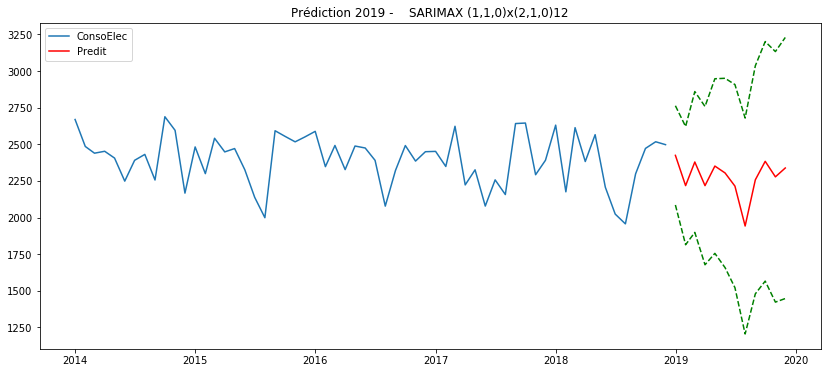

In [48]:
pred_model = results.get_forecast(12)

pred = pred_model.predicted_mean
pred_l = [elt[0] for elt in pred_model.conf_int(alpha=0.05)]
pred_u = [elt[1] for elt in pred_model.conf_int(alpha=0.05)]

fig = plt.figure(figsize=(14,6))
plt.plot(ConsoElec["conso_cdju"], label='ConsoElec')
plt.plot(pd.date_range(ConsoElec.index[len(ConsoElec)-1], periods=12, freq='M'), pred,   color='r', label='Predit')
plt.plot(pd.date_range(ConsoElec.index[len(ConsoElec)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(ConsoElec.index[len(ConsoElec)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
title = "Prédiction 2019 -    SARIMAX ({},{},{})x({},{},{})12".format(p,d,q,P,D,Q)
plt.title(title)
plt.show()

pic = "Prédiction 2019 -   SARIMAX ({},{},{})x({},{},{})12".format(p,d,q,P,D,Q)
fig.savefig(pic, dpi=fig.dpi)

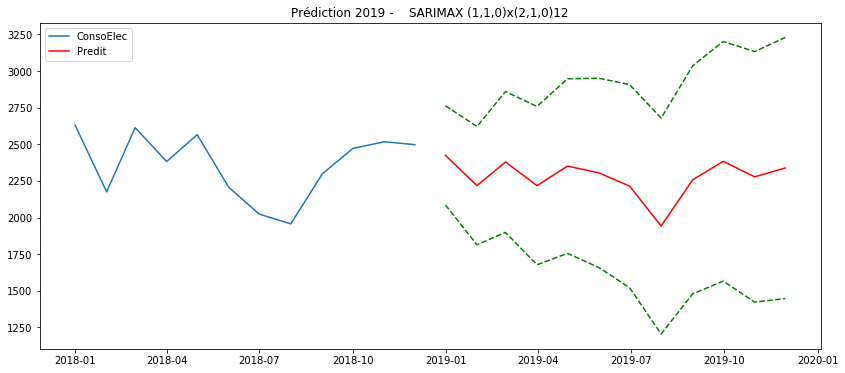

In [49]:
pred_model = results.get_forecast(12)

pred = pred_model.predicted_mean
pred_l = [elt[0] for elt in pred_model.conf_int(alpha=0.05)]
pred_u = [elt[1] for elt in pred_model.conf_int(alpha=0.05)]

fig = plt.figure(figsize=(14,6))
plt.plot(ConsoElec["conso_cdju"]['2018':], label='ConsoElec')   # 2018 + 2019
plt.plot(pd.date_range(ConsoElec.index[len(ConsoElec)-1], periods=12, freq='M'), pred,   color='r', label='Predit')
plt.plot(pd.date_range(ConsoElec.index[len(ConsoElec)-1], periods=12, freq='M'), pred_l, color='g', linestyle='--')
plt.plot(pd.date_range(ConsoElec.index[len(ConsoElec)-1], periods=12, freq='M'), pred_u, color='g', linestyle='--')
plt.legend()
title = "Prédiction 2019 -    SARIMAX ({},{},{})x({},{},{})12".format(p,d,q,P,D,Q)
plt.title(title)
plt.show()

pic = "Prédiction 2019 (2nd) -   SARIMAX ({},{},{})x({},{},{})12".format(p,d,q,P,D,Q)
fig.savefig(pic, dpi=fig.dpi)
